In [2]:
# Make a prediction with coefficients
def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat += coefficients[i + 1] * row[i]
    return yhat

dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
coef = [0.4, 0.8]
for row in dataset:
    yhat = predict(row, coef)
    print("Expected=%.3f, Predicted=%.3f" % (row[-1], yhat))
    

Expected=1.000, Predicted=1.200
Expected=3.000, Predicted=2.000
Expected=3.000, Predicted=3.600
Expected=2.000, Predicted=2.800
Expected=5.000, Predicted=4.400


In [3]:
def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = yhat - row[-1]
            sum_error += error**2
            coef[0] = coef[0] = l_rate * error
            for i in range(len(row)-1):
                coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef

# calculate coefficients
l_rate = 0.001
n_epoch = 50
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

>epoch=0, lrate=0.001, error=46.430
>epoch=1, lrate=0.001, error=41.827
>epoch=2, lrate=0.001, error=37.698
>epoch=3, lrate=0.001, error=34.003
>epoch=4, lrate=0.001, error=30.697
>epoch=5, lrate=0.001, error=27.739
>epoch=6, lrate=0.001, error=25.091
>epoch=7, lrate=0.001, error=22.722
>epoch=8, lrate=0.001, error=20.603
>epoch=9, lrate=0.001, error=18.706
>epoch=10, lrate=0.001, error=17.008
>epoch=11, lrate=0.001, error=15.489
>epoch=12, lrate=0.001, error=14.130
>epoch=13, lrate=0.001, error=12.914
>epoch=14, lrate=0.001, error=11.825
>epoch=15, lrate=0.001, error=10.851
>epoch=16, lrate=0.001, error=9.980
>epoch=17, lrate=0.001, error=9.200
>epoch=18, lrate=0.001, error=8.502
>epoch=19, lrate=0.001, error=7.877
>epoch=20, lrate=0.001, error=7.319
>epoch=21, lrate=0.001, error=6.819
>epoch=22, lrate=0.001, error=6.371
>epoch=23, lrate=0.001, error=5.971
>epoch=24, lrate=0.001, error=5.613
>epoch=25, lrate=0.001, error=5.292
>epoch=26, lrate=0.001, error=5.005
>epoch=27, lrate=0.001

In [7]:
# Linear Regression With Stochastic Gradient Descent for Wine Quality
from random import seed
from random import randrange
from csv import reader
from math import sqrt
 
# Load a CSV file
def load_csv(filename):
	dataset = list()
	with open(filename, 'r') as file:
		csv_reader = reader(file)
		for row in csv_reader:
			if not row:
				continue
			dataset.append(row)
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Find the min and max values for each column
def dataset_minmax(dataset):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate root mean squared error
def rmse_metric(actual, predicted):
	sum_error = 0.0
	for i in range(len(actual)):
		prediction_error = predicted[i] - actual[i]
		sum_error += (prediction_error ** 2)
	mean_error = sum_error / float(len(actual))
	return sqrt(mean_error)
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		rmse = rmse_metric(actual, predicted)
		scores.append(rmse)
	return scores
 
# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat
 
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		for row in train:
			yhat = predict(row, coef)
			error = yhat - row[-1]
			coef[0] = coef[0] - l_rate * error
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
			# print(l_rate, n_epoch, error)
	return coef
 
# Linear Regression Algorithm With Stochastic Gradient Descent
def linear_regression_sgd(train, test, l_rate, n_epoch):
	predictions = list()
	coef = coefficients_sgd(train, l_rate, n_epoch)
	for row in test:
		yhat = predict(row, coef)
		predictions.append(yhat)
	return(predictions)
 
# Linear Regression on wine quality dataset
seed(1)
# load and prepare data
filename = 'winequality-white.csv'
dataset = load_csv(filename)
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
# normalize
minmax = dataset_minmax(dataset)
normalize_dataset(dataset, minmax)
# evaluate algorithm
n_folds = 10
l_rate = 0.1
n_epoch = 50
scores = evaluate_algorithm(dataset, linear_regression_sgd, n_folds, l_rate, n_epoch)
print('Scores: %s' % scores)
print('Mean RMSE: %.3f' % (sum(scores)/float(len(scores))))

Scores: [0.12555931647545562, 0.11956304291181427, 0.12895562563447674, 0.13180959023158623, 0.12408616583608319, 0.12587974807013583, 0.13064110448407817, 0.1236211607285932, 0.1275633748267751, 0.12354145932716311]
Mean RMSE: 0.126


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
data = pd.read_csv('ex1data1.txt', names = ['population', 'profit'])

In [21]:
print(data.head())

   population   profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233


In [25]:
# Split population and profit into X and Y
X_df = pd.DataFrame(data.population)
y_df = pd.DataFrame(data.profit)

# Length, or number of observations, in data
m = len(y_df)

Text(0,0.5,'Profit in $10ks')

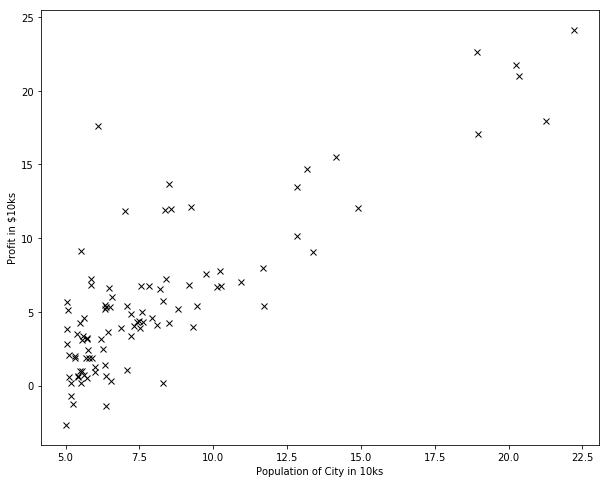

In [27]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'kx')
plt.xlabel('Population of City in 10ks')
plt.ylabel('Profit in $10ks')

Text(0.5,0,'profit')

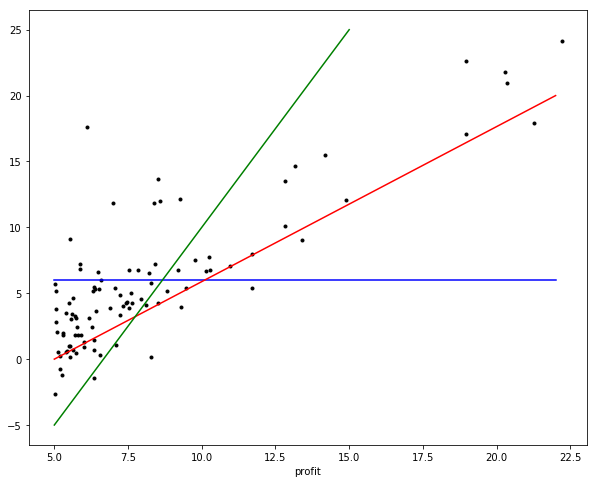

In [29]:
plt.figure(figsize=(10,8))
plt.plot(X_df, y_df, 'k.')
plt.plot([5, 22], [6, 6], 'b-')
plt.plot([5, 22], [0, 20], 'r-')
plt.plot([5, 15], [-5, 25], 'g-')
plt.xlabel('pop')
plt.xlabel('profit')

In [31]:
x_quad = [n/10 for  n in range(0, 100)]
y_quad = [(n-4)**2 + 5 for n in x_quad]

Text(0.5,1,'Quadratic Equation')

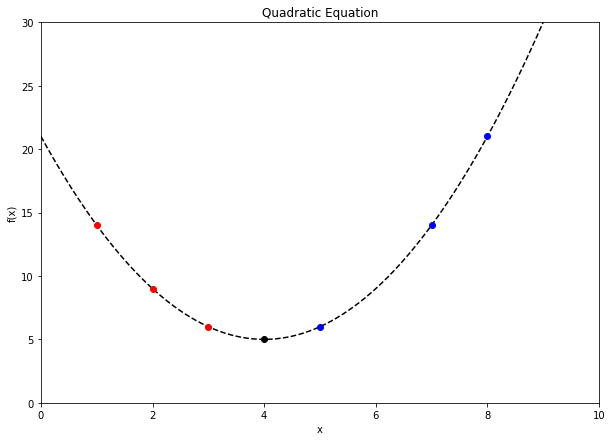

In [33]:
plt.figure(figsize = (10, 7))
plt.plot(x_quad, y_quad, 'k--')
plt.axis([0, 10, 0, 30])
plt.plot([1, 2, 3], [14, 9, 6], 'ro')
plt.plot([5, 7, 8], [6, 14, 21], 'bo')
plt.plot(4, 5, 'ko')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Quadratic Equation')

In [34]:
iterations = 1500
alpha = 0.01

In [36]:
# add a column of 1 as bias (intercept) to X
X_df['intercept']=1

# transform to numpy arrays for easier matrix math, new array theta
X = np.array(X_df)
y = np.array(y_df).flatten()
theta = np.array([0, 0])

In [38]:
def cost_function(X, y, theta):
    # number of training examples
    m = len(y)
    
    # calculate cost w/ given parameters
    J = np.sum((X.dot(theta)-y)**2)/2/m
    
    return J

In [40]:
cost_function(X, y, theta)

32.072733877455676

In [42]:
def gradient_descent(X, y, theta, alpha, iterations):
    
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis - y
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost
        
    return theta, cost_history

In [44]:
(t, c) = gradient_descent(X, y, theta, alpha, iterations)

In [46]:
print(t)

[ 1.16636235 -3.63029144]


In [48]:
print(np.array([3.5, 1]).dot(t))
print(np.array([7, 1]).dot(t))

0.45197678677017716
4.534245012944714


In [50]:
best_fit_x = np.linspace(0, 25, 20)
best_fit_y = [t[1] + t[0]*xx for xx in best_fit_x]

Text(0.5,1,'profit v. pop w/ linear regresssion line')

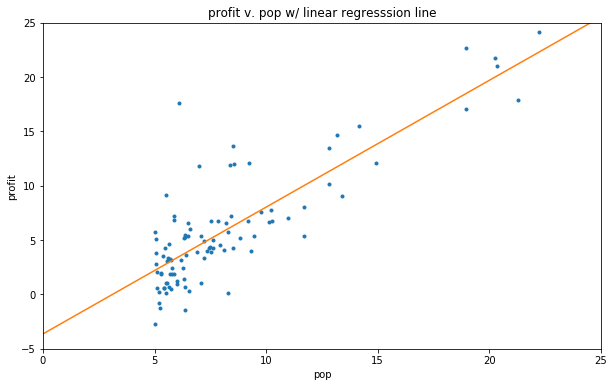

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(X_df.population, y_df, '.')
plt.plot(best_fit_x, best_fit_y, '-')
plt.axis([0, 25, -5, 25])
plt.xlabel('pop')
plt.ylabel('profit')
plt.title('profit v. pop w/ linear regresssion line')

In [54]:
import scipy.stats as stats
import sklearn

In [63]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [73]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

lm = LinearRegression()
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
print('estimated inetercept coeff.:', lm.intercept_)

estimated inetercept coeff.: 36.4911032803611


In [78]:
print('num of coeff.:', len(lm.coef_))

num of coeff.: 13


In [82]:
pd.DataFrame(list(zip(X.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


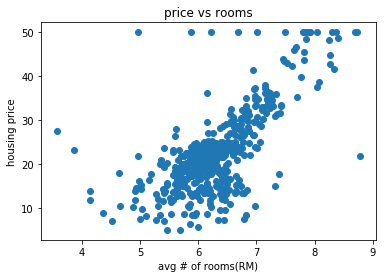

In [84]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("avg # of rooms(RM)")
plt.ylabel("housing price")
plt.title("price vs rooms")
plt.show()

Text(0.5,1,'Prices vs predicted prices: $Y_i$ vs $\\hat{Y}_i$')

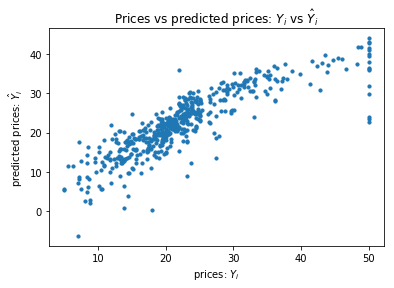

In [118]:
lm.predict(X)[0:5]
plt.scatter(bos.PRICE, lm.predict(X), s=10)
plt.xlabel("prices: $Y_i$")
plt.ylabel("predicted prices: $\hat{Y}_i$")
plt.title("Prices vs predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [91]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print(mseFull)

21.8977792176875


In [94]:
lm.fit(X[['PTRATIO']], bos.PRICE)
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']]))**2)
print(msePTRATIO)

62.65220001376926


In [102]:
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, bos.PRICE, test_size=0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


fit a model x_train, and calculate mse with y_train: 19.546758473534663
fit a model x_train, and calculate MSE with X_test, Y_test 28.54136727561835


Text(0,0.5,'residuals')

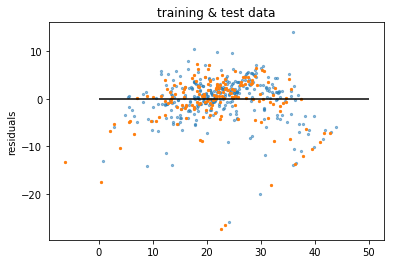

In [128]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)

print("fit a model x_train, and calculate mse with y_train:", np.mean((Y_train - lm.predict(X_train))**2))
print("fit a model x_train, and calculate MSE with X_test, Y_test", np.mean((Y_test - lm.predict(X_test))**2))
plt.scatter(pred_train, pred_train-Y_train, s=5, alpha=0.5)
plt.scatter(pred_test, pred_test-Y_test, s=5)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('training & test data')
plt.ylabel('residuals')

In [1]:
from math import exp

def predict(row, coefficients):
    yhat = coefficients[0]
    for i in range(len(row)-1):
        yhat = coefficients[i + 1] * row[i]
    return 1.0 / (1.0 + exp(-yhat))

def coefficients_sgd(train, l_rate, n_epoch):
    coef = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0
        for row in train:
            yhat = predict(row, coef)
            error = row[-1] - yhat
            sum_error += error**2
            coef[0] = coef[0] + l_rate*error*yhat*(1.0-yhat)
            for i in range(len(row)-1):
                coef[i+1] = coef[i+1] + l_rate*error*yhat*(1.0-yhat)*row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return coef
            

# test predictions
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]
l_rate = 0.01
n_epoch = 10000
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)

>epoch=0, lrate=0.010, error=2.508
>epoch=1, lrate=0.010, error=2.503
>epoch=2, lrate=0.010, error=2.499
>epoch=3, lrate=0.010, error=2.494
>epoch=4, lrate=0.010, error=2.490
>epoch=5, lrate=0.010, error=2.487
>epoch=6, lrate=0.010, error=2.484
>epoch=7, lrate=0.010, error=2.481
>epoch=8, lrate=0.010, error=2.478
>epoch=9, lrate=0.010, error=2.475
>epoch=10, lrate=0.010, error=2.473
>epoch=11, lrate=0.010, error=2.471
>epoch=12, lrate=0.010, error=2.469
>epoch=13, lrate=0.010, error=2.467
>epoch=14, lrate=0.010, error=2.466
>epoch=15, lrate=0.010, error=2.464
>epoch=16, lrate=0.010, error=2.463
>epoch=17, lrate=0.010, error=2.462
>epoch=18, lrate=0.010, error=2.460
>epoch=19, lrate=0.010, error=2.459
>epoch=20, lrate=0.010, error=2.458
>epoch=21, lrate=0.010, error=2.457
>epoch=22, lrate=0.010, error=2.457
>epoch=23, lrate=0.010, error=2.456
>epoch=24, lrate=0.010, error=2.455
>epoch=25, lrate=0.010, error=2.454
>epoch=26, lrate=0.010, error=2.454
>epoch=27, lrate=0.010, error=2.453
>e

>epoch=498, lrate=0.010, error=2.446
>epoch=499, lrate=0.010, error=2.446
>epoch=500, lrate=0.010, error=2.446
>epoch=501, lrate=0.010, error=2.446
>epoch=502, lrate=0.010, error=2.446
>epoch=503, lrate=0.010, error=2.446
>epoch=504, lrate=0.010, error=2.446
>epoch=505, lrate=0.010, error=2.446
>epoch=506, lrate=0.010, error=2.446
>epoch=507, lrate=0.010, error=2.446
>epoch=508, lrate=0.010, error=2.446
>epoch=509, lrate=0.010, error=2.446
>epoch=510, lrate=0.010, error=2.446
>epoch=511, lrate=0.010, error=2.446
>epoch=512, lrate=0.010, error=2.446
>epoch=513, lrate=0.010, error=2.446
>epoch=514, lrate=0.010, error=2.446
>epoch=515, lrate=0.010, error=2.446
>epoch=516, lrate=0.010, error=2.446
>epoch=517, lrate=0.010, error=2.446
>epoch=518, lrate=0.010, error=2.446
>epoch=519, lrate=0.010, error=2.446
>epoch=520, lrate=0.010, error=2.446
>epoch=521, lrate=0.010, error=2.446
>epoch=522, lrate=0.010, error=2.446
>epoch=523, lrate=0.010, error=2.446
>epoch=524, lrate=0.010, error=2.446
>

>epoch=2003, lrate=0.010, error=2.446
>epoch=2004, lrate=0.010, error=2.446
>epoch=2005, lrate=0.010, error=2.446
>epoch=2006, lrate=0.010, error=2.446
>epoch=2007, lrate=0.010, error=2.446
>epoch=2008, lrate=0.010, error=2.446
>epoch=2009, lrate=0.010, error=2.446
>epoch=2010, lrate=0.010, error=2.446
>epoch=2011, lrate=0.010, error=2.446
>epoch=2012, lrate=0.010, error=2.446
>epoch=2013, lrate=0.010, error=2.446
>epoch=2014, lrate=0.010, error=2.446
>epoch=2015, lrate=0.010, error=2.446
>epoch=2016, lrate=0.010, error=2.446
>epoch=2017, lrate=0.010, error=2.446
>epoch=2018, lrate=0.010, error=2.446
>epoch=2019, lrate=0.010, error=2.446
>epoch=2020, lrate=0.010, error=2.446
>epoch=2021, lrate=0.010, error=2.446
>epoch=2022, lrate=0.010, error=2.446
>epoch=2023, lrate=0.010, error=2.446
>epoch=2024, lrate=0.010, error=2.446
>epoch=2025, lrate=0.010, error=2.446
>epoch=2026, lrate=0.010, error=2.446
>epoch=2027, lrate=0.010, error=2.446
>epoch=2028, lrate=0.010, error=2.446
>epoch=2029,

>epoch=3500, lrate=0.010, error=2.446
>epoch=3501, lrate=0.010, error=2.446
>epoch=3502, lrate=0.010, error=2.446
>epoch=3503, lrate=0.010, error=2.446
>epoch=3504, lrate=0.010, error=2.446
>epoch=3505, lrate=0.010, error=2.446
>epoch=3506, lrate=0.010, error=2.446
>epoch=3507, lrate=0.010, error=2.446
>epoch=3508, lrate=0.010, error=2.446
>epoch=3509, lrate=0.010, error=2.446
>epoch=3510, lrate=0.010, error=2.446
>epoch=3511, lrate=0.010, error=2.446
>epoch=3512, lrate=0.010, error=2.446
>epoch=3513, lrate=0.010, error=2.446
>epoch=3514, lrate=0.010, error=2.446
>epoch=3515, lrate=0.010, error=2.446
>epoch=3516, lrate=0.010, error=2.446
>epoch=3517, lrate=0.010, error=2.446
>epoch=3518, lrate=0.010, error=2.446
>epoch=3519, lrate=0.010, error=2.446
>epoch=3520, lrate=0.010, error=2.446
>epoch=3521, lrate=0.010, error=2.446
>epoch=3522, lrate=0.010, error=2.446
>epoch=3523, lrate=0.010, error=2.446
>epoch=3524, lrate=0.010, error=2.446
>epoch=3525, lrate=0.010, error=2.446
>epoch=3526,

>epoch=5015, lrate=0.010, error=2.446
>epoch=5016, lrate=0.010, error=2.446
>epoch=5017, lrate=0.010, error=2.446
>epoch=5018, lrate=0.010, error=2.446
>epoch=5019, lrate=0.010, error=2.446
>epoch=5020, lrate=0.010, error=2.446
>epoch=5021, lrate=0.010, error=2.446
>epoch=5022, lrate=0.010, error=2.446
>epoch=5023, lrate=0.010, error=2.446
>epoch=5024, lrate=0.010, error=2.446
>epoch=5025, lrate=0.010, error=2.446
>epoch=5026, lrate=0.010, error=2.446
>epoch=5027, lrate=0.010, error=2.446
>epoch=5028, lrate=0.010, error=2.446
>epoch=5029, lrate=0.010, error=2.446
>epoch=5030, lrate=0.010, error=2.446
>epoch=5031, lrate=0.010, error=2.446
>epoch=5032, lrate=0.010, error=2.446
>epoch=5033, lrate=0.010, error=2.446
>epoch=5034, lrate=0.010, error=2.446
>epoch=5035, lrate=0.010, error=2.446
>epoch=5036, lrate=0.010, error=2.446
>epoch=5037, lrate=0.010, error=2.446
>epoch=5038, lrate=0.010, error=2.446
>epoch=5039, lrate=0.010, error=2.446
>epoch=5040, lrate=0.010, error=2.446
>epoch=5041,

>epoch=6521, lrate=0.010, error=2.446
>epoch=6522, lrate=0.010, error=2.446
>epoch=6523, lrate=0.010, error=2.446
>epoch=6524, lrate=0.010, error=2.446
>epoch=6525, lrate=0.010, error=2.446
>epoch=6526, lrate=0.010, error=2.446
>epoch=6527, lrate=0.010, error=2.446
>epoch=6528, lrate=0.010, error=2.446
>epoch=6529, lrate=0.010, error=2.446
>epoch=6530, lrate=0.010, error=2.446
>epoch=6531, lrate=0.010, error=2.446
>epoch=6532, lrate=0.010, error=2.446
>epoch=6533, lrate=0.010, error=2.446
>epoch=6534, lrate=0.010, error=2.446
>epoch=6535, lrate=0.010, error=2.446
>epoch=6536, lrate=0.010, error=2.446
>epoch=6537, lrate=0.010, error=2.446
>epoch=6538, lrate=0.010, error=2.446
>epoch=6539, lrate=0.010, error=2.446
>epoch=6540, lrate=0.010, error=2.446
>epoch=6541, lrate=0.010, error=2.446
>epoch=6542, lrate=0.010, error=2.446
>epoch=6543, lrate=0.010, error=2.446
>epoch=6544, lrate=0.010, error=2.446
>epoch=6545, lrate=0.010, error=2.446
>epoch=6546, lrate=0.010, error=2.446
>epoch=6547,

>epoch=8025, lrate=0.010, error=2.446
>epoch=8026, lrate=0.010, error=2.446
>epoch=8027, lrate=0.010, error=2.446
>epoch=8028, lrate=0.010, error=2.446
>epoch=8029, lrate=0.010, error=2.446
>epoch=8030, lrate=0.010, error=2.446
>epoch=8031, lrate=0.010, error=2.446
>epoch=8032, lrate=0.010, error=2.446
>epoch=8033, lrate=0.010, error=2.446
>epoch=8034, lrate=0.010, error=2.446
>epoch=8035, lrate=0.010, error=2.446
>epoch=8036, lrate=0.010, error=2.446
>epoch=8037, lrate=0.010, error=2.446
>epoch=8038, lrate=0.010, error=2.446
>epoch=8039, lrate=0.010, error=2.446
>epoch=8040, lrate=0.010, error=2.446
>epoch=8041, lrate=0.010, error=2.446
>epoch=8042, lrate=0.010, error=2.446
>epoch=8043, lrate=0.010, error=2.446
>epoch=8044, lrate=0.010, error=2.446
>epoch=8045, lrate=0.010, error=2.446
>epoch=8046, lrate=0.010, error=2.446
>epoch=8047, lrate=0.010, error=2.446
>epoch=8048, lrate=0.010, error=2.446
>epoch=8049, lrate=0.010, error=2.446
>epoch=8050, lrate=0.010, error=2.446
>epoch=8051,

>epoch=9665, lrate=0.010, error=2.446
>epoch=9666, lrate=0.010, error=2.446
>epoch=9667, lrate=0.010, error=2.446
>epoch=9668, lrate=0.010, error=2.446
>epoch=9669, lrate=0.010, error=2.446
>epoch=9670, lrate=0.010, error=2.446
>epoch=9671, lrate=0.010, error=2.446
>epoch=9672, lrate=0.010, error=2.446
>epoch=9673, lrate=0.010, error=2.446
>epoch=9674, lrate=0.010, error=2.446
>epoch=9675, lrate=0.010, error=2.446
>epoch=9676, lrate=0.010, error=2.446
>epoch=9677, lrate=0.010, error=2.446
>epoch=9678, lrate=0.010, error=2.446
>epoch=9679, lrate=0.010, error=2.446
>epoch=9680, lrate=0.010, error=2.446
>epoch=9681, lrate=0.010, error=2.446
>epoch=9682, lrate=0.010, error=2.446
>epoch=9683, lrate=0.010, error=2.446
>epoch=9684, lrate=0.010, error=2.446
>epoch=9685, lrate=0.010, error=2.446
>epoch=9686, lrate=0.010, error=2.446
>epoch=9687, lrate=0.010, error=2.446
>epoch=9688, lrate=0.010, error=2.446
>epoch=9689, lrate=0.010, error=2.446
>epoch=9690, lrate=0.010, error=2.446
>epoch=9691,

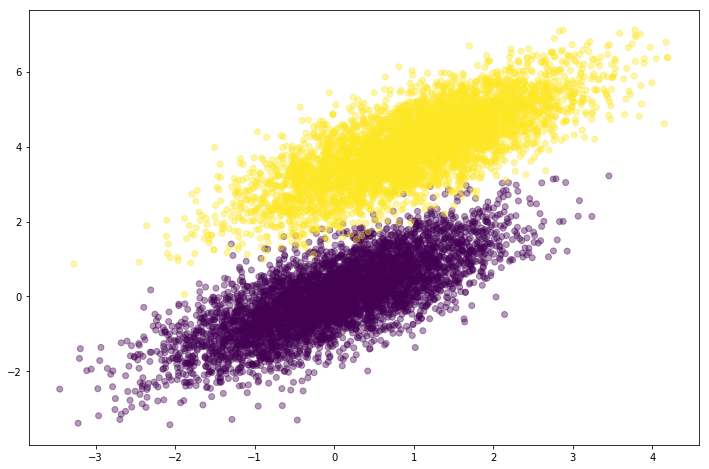

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0], [[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4], [[1, .75],[.75, 1]], num_observations)

simulated_separableish_features = np.vstack((x1, x2)).astype(np.float32)
simulated_labels = np.hstack((np.zeros(num_observations),
                              np.ones(num_observations)))

plt.figure(figsize=(12,8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:, 1], c=simulated_labels, alpha = .4)

In [20]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

def logistic_regression(features, target, num_steps, learning_rate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((features.shape[0], 1))
        features = np.hstack((intercept, features))
        
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)
        predictions = sigmoid(scores)
        
        output_error_signal = target - predictions
        gradient = np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        
        if step % 10000 == 0:
            print(log_likelihood(features, target, weights))

    return weights

In [21]:
weights = logistic_regression(simulated_separableish_features, simulated_labels,
                             num_steps = 300000, learning_rate = 5e-5, add_intercept=True)

-4346.264779152365
-148.70672276805357
-142.9649362310784
-141.54530307157367
-141.06031965930796
-140.87031585891606
-140.79025912753815
-140.75505002269915
-140.73914503180956
-140.73183498915878
-140.72843666694826
-140.72684471255332
-140.72609508950472
-140.725740860523
-140.72557306887177
-140.72549345786166
-140.72545564250743
-140.72543766614328
-140.72542911609156
-140.7254250479478
-140.72542311181695
-140.72542219020232
-140.72542175145267
-140.72542154256132
-140.72542144310108
-140.7254213957429
-140.7254213731925
-140.72542136245454
-140.72542135734136
-140.72542135490647


In [25]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(simulated_separableish_features, simulated_labels)

print (clf.intercept_, clf.coef_)
print (weights)

[-13.99400797] [[-5.02712572  8.23286799]]
[-14.09225541  -5.05899648   8.28955762]


In [30]:
data_with_intercept = np.hstack((np.ones((simulated_separableish_features.shape[0], 1)),
                                simulated_separableish_features))
final_scores = np.dot(data_with_intercept, weights)
preds = np.round(sigmoid(final_scores))

print('Accuracy from scratch: {0}'.format((preds == simulated_labels).sum().astype(float) / len(preds)))
print('Accuracy from sk-learn: {0}'.format(clf.score(simulated_separableish_features, simulated_labels)))

Accuracy from scratch: 0.9948
Accuracy from sk-learn: 0.9948


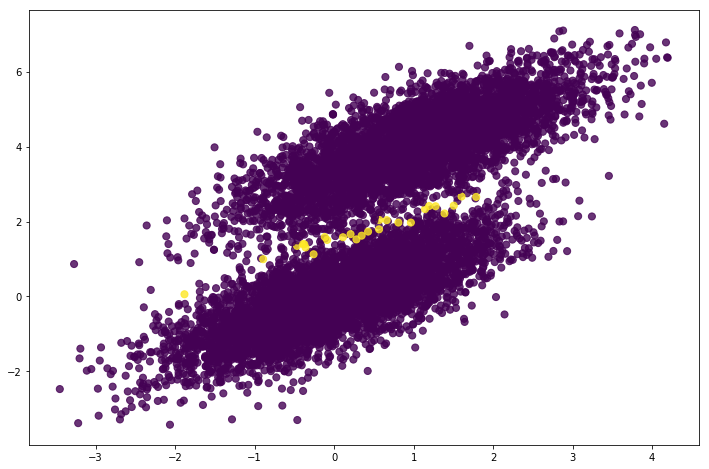

In [34]:
plt.figure(figsize = (12, 8))
plt.scatter(simulated_separableish_features[:, 0], simulated_separableish_features[:,1],
           c=preds==simulated_labels - 1, alpha = .8, s=50)